**We will use the 'Breast Histopathology Images' dataset. This dataset consists of 277,524 image patches of size 50x50 (198,738 IDC negative and 78,786 IDC positive). The images are in png format.**

**Invasive Ductal Carcinoma**
This is the most common subtype of all breast cancers. Almost 80% of diagnosed breast cancers are of this subtype.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/kaggle/all_images_dir

/content/gdrive/MyDrive/kaggle/all_images_dir


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [ ]:
pwd

'/content/gdrive/MyDrive/kaggle/all_images_dir'

In [ ]:
import pandas as pd
import numpy as np

import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
IMAGE_SIZE = 50

In [ ]:
os.listdir()

['10273_idx5_x2251_y401_class0.png',
 '10273_idx5_x2201_y451_class0.png',
 '10273_idx5_x2301_y2451_class0.png',
 '10273_idx5_x2251_y601_class0.png',
 '10273_idx5_x2001_y501_class0.png',
 '10273_idx5_x2101_y601_class0.png',
 '10273_idx5_x2301_y501_class0.png',
 '10273_idx5_x2451_y1_class0.png',
 '10273_idx5_x2451_y101_class0.png',
 '10273_idx5_x2351_y551_class0.png',
 '10273_idx5_x2351_y401_class0.png',
 '10273_idx5_x2401_y2301_class0.png',
 '10273_idx5_x2401_y251_class0.png',
 '10273_idx5_x2401_y651_class0.png',
 '10273_idx5_x2401_y701_class0.png',
 '10273_idx5_x2451_y201_class0.png',
 '10273_idx5_x2401_y101_class0.png',
 '10273_idx5_x2401_y751_class0.png',
 '10273_idx5_x2351_y301_class0.png',
 '10273_idx5_x2401_y1_class0.png',
 '10273_idx5_x2401_y2451_class0.png',
 '10273_idx5_x2401_y351_class0.png',
 '10273_idx5_x2451_y151_class0.png',
 '10273_idx5_x2401_y551_class0.png',
 '10273_idx5_x2351_y2351_class0.png',
 '10273_idx5_x2351_y601_class0.png',
 '10273_idx5_x2401_y301_class0.png',
 

In [ ]:
patients = os.listdir()

In [ ]:
# Creating a new directory to store all available images
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)

In [ ]:
ls

10253_idx5_x1001_y1101_class0.png  10264_idx5_x301_y2001_class0.png
10253_idx5_x1001_y1151_class0.png  10264_idx5_x301_y2051_class0.png
10253_idx5_x1001_y1201_class0.png  10264_idx5_x351_y1451_class0.png
10253_idx5_x1001_y1351_class0.png  10264_idx5_x351_y1551_class0.png
10253_idx5_x1001_y1501_class0.png  10264_idx5_x351_y1601_class0.png
10253_idx5_x1001_y1551_class0.png  10264_idx5_x351_y1801_class0.png
10253_idx5_x1001_y1701_class0.png  10264_idx5_x351_y1851_class0.png
10253_idx5_x1001_y351_class0.png   10264_idx5_x351_y1901_class0.png
10253_idx5_x1001_y401_class0.png   10264_idx5_x351_y2101_class0.png
10253_idx5_x1001_y451_class0.png   10264_idx5_x401_y1551_class0.png
10253_idx5_x1001_y601_class0.png   10264_idx5_x401_y1601_class0.png
10253_idx5_x1001_y651_class0.png   10264_idx5_x401_y1651_class0.png
10253_idx5_x1001_y751_class0.png   10264_idx5_x401_y1751_class0.png
10253_idx5_x1001_y951_class0.png   10264_idx5_x401_y1801_class0.png
10253_idx5_x1051_y1001_class0.png  10264_idx5_x4

In [ ]:
# This code copies all images from their seperate folders into the same 
# folder called all_images_dir.

# Create a list with all the patient id numbers.
# Each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'

# create a list of all patient id's
patient_list = os.listdir()

for patient in patient_list:
    
    path_0 =  str(patient) + '/0'
    path_1 =  str(patient) + '/1'


    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
len(os.listdir())

9319

In [ ]:
image_list = os.listdir()

df_data = pd.DataFrame(image_list, columns=['image_id'])

df_data.head()

,image_id
0,10273_idx5_x2201_y451_class0.png
1,10273_idx5_x2301_y2451_class0.png
2,10273_idx5_x2251_y601_class0.png
3,10273_idx5_x2001_y501_class0.png
4,10273_idx5_x2101_y601_class0.png


In [ ]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head(10)

In [ ]:
df_data.shape

(9318, 3)

In [ ]:
# What is the class distribution?

df_data['target'].value_counts()

In [ ]:
# take a sample of the majority class 0 (total = 4843)
df_0 = df_data[df_data['target'] == '0'].sample(4843, random_state=101)
# take a sample of class 1 (total = 4843)
df_1 = df_data[df_data['target'] == '1'].sample(4843, random_state=101)

# concat the two dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

# Check the new class distribution
df_data['target'].value_counts()

,image_id,patient_id,target


In [ ]:
# train_test_split

# stratify=y creates a balanced validation set.
y = df_data['target']

df_train, df_val = train_test_split(df_data, test_size=0.33, random_state=42, stratify=y)

print(df_train.shape)
print(df_val.shape)

(6489, 3)
(3197, 3)


In [ ]:
df_train['target'].value_counts()

1    3245
0    3244
Name: target, dtype: int64

In [ ]:
df_val['target'].value_counts()

0    1599
1    1598
Name: target, dtype: int64

In [ ]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_idc
    # b_has_idc

# val_dir
    # a_no_idc
    # b_has_idc



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_no_idc = os.path.join(train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)

In [ ]:
# check that the folders have been created
os.listdir('base_dir/train_dir')

['a_no_idc', 'b_has_idc']

In [ ]:
# Set the id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [ ]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    

# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    

    # source path to image
    src = os.path.join(fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [ ]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

3244
3245


In [ ]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_idc')))
print(len(os.listdir('base_dir/val_dir/b_has_idc')))

1599
1598


In [ ]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'


num_train_samples =  len(os.listdir('base_dir/train_dir/a_no_idc')) + len(os.listdir('base_dir/train_dir/b_has_idc'))
num_val_samples = len(os.listdir('base_dir/val_dir/a_no_idc')) + len(os.listdir('base_dir/val_dir/b_has_idc'))
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
pwd

'/content/gdrive/My Drive/kaggle/all_images_dir'

In [ ]:
datagen = ImageDataGenerator(rescale=1/255)
train_gen = datagen.flow_from_directory(train_path,target_size=(50,50),batch_size=train_batch_size,class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,target_size=(50,50),batch_size=val_batch_size,class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,target_size=(50,50),batch_size=1,class_mode='categorical',shuffle=False)

Found 6489 images belonging to 2 classes.
Found 3197 images belonging to 2 classes.
Found 3197 images belonging to 2 classes.


In [ ]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128
IMAGE_SIZE=50

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

In [ ]:
results = model.fit_generator(train_gen, steps_per_epoch=train_steps, validation_data=val_gen,validation_steps=val_steps, epochs=60, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
649/649 [==============================] - 4027s 6s/step - loss: 0.4396 - accuracy: 0.8145 - val_loss: 0.4725 - val_accuracy: 0.7892
Epoch 2/60
649/649 [==============================] - 19s 30ms/step - loss: 0.3967 - accuracy: 0.8326 - val_loss: 0.3649 - val_accuracy: 0.8486
Epoch 3/60
649/649 [==============================] - 19s 30ms/step - loss: 0.3876 - accuracy: 0.8363 - val_loss: 0.3483 - val_accuracy: 0.8555
Epoch 4/60
649/649 [==============================] - 20s 30ms/step - loss: 0.3853 - accuracy: 0.8393 - val_loss: 0.3459 - val_accuracy: 0.8636
Epoch 5/60
649/649 [==============================] - 19s 30ms/step - loss: 0.3787 - accuracy: 0.8366 - val_loss: 0.3446 - val_accuracy: 0.8611
Epoch 6/60
649/649 [==============================] - 19s 30ms/step - loss: 0.3794 - accuracy: 0.8387 - val_loss: 0.3542 - val_accuracy: 0.8511
Epoch 7/60
649/649 [==============================] - 19s 30ms/step - loss: 0.3742 - accuracy: 0.8425 - val_loss: 0.3486 - val_accuracy:

In [ ]:
#Saving model weights
model.save('breastcanceridcweights2.h5')

In [ ]:
#Saving model structure
json_config = model.to_json()

In [ ]:
with open("breastcanceridc2.json", "w") as json_file:
    json_file.write(json_config)

In [ ]:
model.load_weights("../breastcancermodel.h5")

In [ ]:
predictions = model.predict(test_gen, verbose=1)

3197/3197 [==============================] - 2096s 647ms/step


In [ ]:
predictions.shape

(3197, 2)

In [ ]:
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [ ]:
df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

df_preds.head()

,no_idc,has_idc
0,0.756116,2.438838e-01
1,0.632775,3.672254e-01
2,0.997453,2.546745e-03
3,1.000000,7.805281e-14
4,0.576115,4.238853e-01


In [ ]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9635277367503625

In [ ]:
test_labels = test_gen.classes
test_labels.shape

(3197,)

In [ ]:
cm_plot_labels = ['no_idc', 'has_idc']

In [ ]:
confusion_matrix(test_labels, predictions.argmax(axis=1))

array([[1364,  235],
       [  89, 1509]])

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

      no_idc       0.94      0.85      0.89      1599
     has_idc       0.87      0.94      0.90      1598

    accuracy                           0.90      3197
   macro avg       0.90      0.90      0.90      3197
weighted avg       0.90      0.90      0.90      3197



In [ ]:
results.history['accuracy']

[0.7918015122413635,
 0.8331021666526794,
 0.8386500477790833,
 0.8369548320770264,
 0.8403452038764954,
 0.8438896536827087,
 0.8448143005371094,
 0.84573894739151,
 0.8551394939422607,
 0.8508244752883911,
 0.8492833971977234,
 0.8551394939422607,
 0.8565264344215393,
 0.8589921593666077,
 0.8528278470039368,
 0.8609955310821533,
 0.8582215905189514,
 0.8623824715614319,
 0.8620742559432983,
 0.867467999458313,
 0.8670057058334351,
 0.8696255087852478,
 0.8736323118209839,
 0.8774849772453308,
 0.8791801333427429,
 0.8878101110458374,
 0.887656033039093,
 0.8919710516929626,
 0.8927415609359741,
 0.8967483639717102]

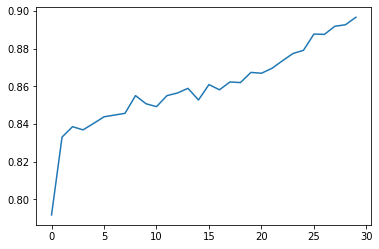

In [ ]:
plt.plot(results.history['accuracy'])

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
val_loss, val_acc = model.evaluate_generator(test_gen)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


val_loss: 0.33109432458877563
val_acc: 0.8764466643333435


In [ ]:
import numpy as np
from keras.preprocessing import image

has_idc_file = 'base_dir/val_dir/b_has_idc/10253_idx5_x601_y251_class1.png'

has_idc_img = image.load_img(has_idc_file, target_size=(50, 50))

has_idc_img = image.img_to_array(has_idc_img)

has_idc_img = np.expand_dims(has_idc_img, axis=0)
has_idc_img = has_idc_img/255

In [ ]:
prediction_prob = model.predict(has_idc_img)

In [ ]:
# Output prediction
print(f'Probability that image has a idc is: {prediction_prob} ')

Probability that image has a idc is: [[0.36812556 0.63187444]] 
